# GEOL 7720 Exercise 6
### November 8$^{th}$
### Ian Deniset

## Problem
Solve for a simple receiver function using explicit regularization instead of a typical water level deconvolution

## Theory
In seismology, the recorded data $d(t)$ is given by a source wavelet $w(t)$ convolved with the earth's impulse response function $g(t)$ or Green's Function (there is also the receiver response $r(t)$, but it will be ignored for the purposes of this exercise):

$d(t) = g(t)*w(t)$

Since $g(t)$ represents the actual earth structure, is is the ideal time-series information to conduct interpretation on.  Thus, in order to obtain $g(t)$ we must know both $d(t)$ and $w(t)$ then deconvolve one from the other.  This deconvolution is in fact a linear inverse problem:

$d(t)=g(t)*w(t)=\int g(\tau)w(t-\tau)d\tau = \int g(\tau)k_i (\tau)d \tau = \langle g,k_i \rangle$

where $k_i (\tau) = w(t-\tau)$

#### Spectral Division
Looking at the above problem, one apparent and very simple solution is to simply Fourier transform the data then perform spectral division to obtain the Green's function:

$D(\omega)=W(\omega)G(\omega)$

$G(\omega)=\frac{D(\omega)}{W(\omega)}$

This method however becomes unstable when the source function lacks energy at all frequencies - essentially leading to a division by zero.  In order to overcome this issue, regularization is needed by imposing assumptions about the Green's function.  

The easiest way to do this is by imposing a minimum value $F$ on all unknown/unstable frequencies in the source function through the use of a water level.  To implement this, we must first multiply both the data and source function by the conjugate of the source function to avoid introducing phase shifts to the solution.  This gives:

$G(\omega)=\frac{D(\omega)W(\omega)^*}{max(W(\omega)W(\omega)^*,F)}$

where $F$ is the water level value.

#### Damped Deconvolution
Another method of stabilizing low energy or unknow frequencies in the denominator is through the use of explicit regularization by introducing damping with a weight of $\delta$:

$\begin{bmatrix} W(\omega) \\ \delta \end{bmatrix} G(\omega) = \begin{bmatrix} D(\omega) \\ 0 \end{bmatrix}$

Writing out the system of normal equations gives the damped deconvolution of:

$G(\omega)=\frac{D(\omega)W(\omega)^*}{W(\omega)W(\omega)^*+\delta^2}$

### Receiver Functions
For teleseismic earthquake arrivals, the P wave arrives both significantly ahead of all other arrivals and on a nearly vertical ray path.  This means that recorded energy on the source side will be represented by vertical P wave energy and horizontal (radial) P to S conversion energy:

$z(t)=w(t)*g_Z(t)$

$r(t)=w(t)*g_R(t)$

Through the assumption that $g_Z(t)$ is an impulse response function $\delta (t)$, then $z(t)$ can be taken as the source function $w(t)$ giving:

$r(t) = w(t)*g_R (t) = z(t)*g_R(t)$

This means that we can solve for the earth's radial Green's function through the deconvolution methods presented above:

$G_R(\omega)=\frac{R(\omega)Z(\omega)^*}{Z(\omega)Z(\omega)^*}$

## Solution

In [1]:
#import the usual modules
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
%matplotlib inline

### Initial Exploration of Data
Data provided is vertical and radial data recorded at Star Lake, Manitoba from an earthquake in the Kuril Islands

In [2]:
#read radial and vertical traces into new obspy 'stream' objects
SLUM_R = op.read('arrival.r')
SLUM_Z = op.read('arrival.z')
combinedData = SLUM_R + SLUM_Z

print('Data Summary: \n', combinedData)

Data Summary: 
 2 Trace(s) in Stream:
.SLUM..BHR    | 2006-11-15T11:24:56.075047Z - 2006-11-15T11:27:06.075047Z | 40.0 Hz, 5201 samples
.SLUM..SLUMZ2 | 2006-11-15T11:24:56.075047Z - 2006-11-15T11:27:06.075047Z | 40.0 Hz, 5201 samples


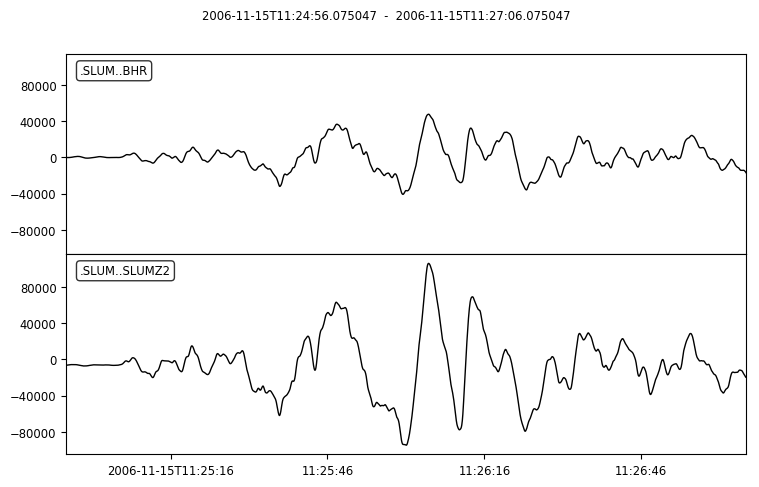

In [3]:
#quick plot using built in obspy functions
combinedData.plot()

In [4]:
#assign first 'trace' object to variable for radial and vertical traces
traceRadial = SLUM_R[0]     
traceVert = SLUM_Z[0]

print('Radial Trace Stats: \n\n', traceRadial.stats)
print('\n\n Vertical Trace Stats: \n\n',traceVert.stats)

Radial Trace Stats: 

          network: 
         station: SLUM
        location: 
         channel: BHR
       starttime: 2006-11-15T11:24:56.075047Z
         endtime: 2006-11-15T11:27:06.075047Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 5201
           calib: 1.0
         _format: SAC
             sac: AttribDict({'cmpaz': 135.91605, 'lcalda': 1, 'depmin': -40792.715, 'az': 40.88343, 'iftype': 1, 'b': 639.99805, 'nzhour': 11, 'cmpinc': 90.0, 'depmax': 47637.668, 'evdp': 30.299999, 'npts': 5201, 'evlo': 153.23, 'stla': 49.75267, 'kstnm': 'SLUM    ', 'e': 769.99805, 'nzjday': 319, 'nzsec': 16, 'baz': 315.91605, 'depmen': 495.29288, 'delta': 0.025, 'lovrok': 1, 'stel': 344.0, 'gcarc': 67.211319, 'o': 0.0, 'nvhdr': 6, 'dist': 7464.1196, 'nzyear': 2006, 'stlo': -95.257393, 'kcmpnm': 'BHR     ', 'kevnm': '        ', 'lpspol': 1, 'nzmin': 14, 'leven': 1, 'nzmsec': 77, 'evla': 46.606998, 'unused23': 0})


 Vertical Trace Stats: 

          network: 
         station: 

In [5]:
#extract ndarray waveform information from 'trace' object
R = traceRadial.data
V = traceVert.data

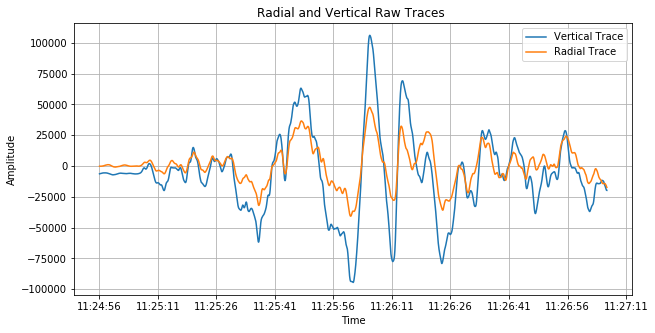

In [6]:
#plot the data using matplotlib; more control
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(traceVert.times('matplotlib'), V, label='Vertical Trace')
ax.plot(traceRadial.times('matplotlib'), R, label='Radial Trace')

ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Radial and Vertical Raw Traces ')
ax.xaxis_date()
ax.grid(which='both')
ax.legend()
plt.show()

### Naive Approach - No Frequency Stabilization
With a first pass data investigation complete, a naive spectral deconvolution will be completed for an initial comparison

In [7]:
#various params
dt = traceVert.stats['delta']
nPoints = traceVert.stats['npts']
Fs = traceVert.stats['sampling_rate']
sigLen = nPoints * dt

In [8]:
#calculate radial and vertical spectrums
R_spec = np.fft.fft(R)
V_spec = np.fft.fft(V)

df = 1 / sigLen
freqs = np.arange(0, Fs, df)
freqsP = freqs[0:nPoints//2]

In [9]:
#perform naive spectral deconvolution and compute resultant time domain receiver function
naive_rfSpec = R_spec / V_spec
naive_rf = np.fft.ifft(naive_rfSpec)

In [10]:
#center receiver function on zero time
ztime = 15
naive_rf = np.roll(naive_rf, round(ztime/dt))
time_rf = np.arange(0,nPoints,1)*dt - ztime

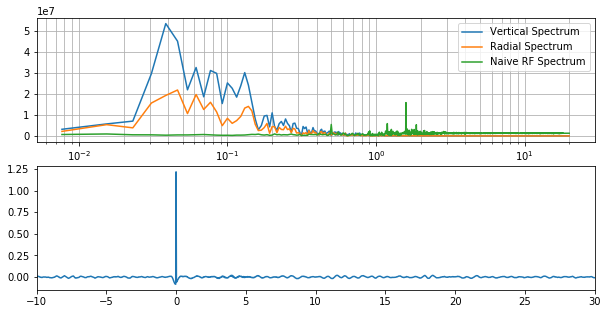

In [11]:
#plot data
fig,ax = plt.subplots(2,1,figsize=(10,5))

ax[0].plot(freqsP,abs(V_spec[0:nPoints//2]), label='Vertical Spectrum')
ax[0].plot(freqsP,abs(R_spec[0:nPoints//2]), label='Radial Spectrum')
ax[0].plot(freqsP,abs(naive_rfSpec[0:nPoints//2])*10e5, label='Naive RF Spectrum')
ax[0].set_xscale('log')
ax[0].grid(which='both')
ax[0].legend()

ax[1].plot(time_rf, naive_rf.real)
ax[1].set_xlim(-10,30)

plt.show()

##### Comments
Looking at the naive receiver function results, it is clear how unstable the solution can be.  In the top plot, the raw radial and vertical amplitude spectra are shown - as can be seen, neither of the traces contain significant energy above 0.2 Hz.  Thus, when the naive spectral deconvolution is performed, the high frequency unstable noise will dominate the solution.  This can be seen by looking at the resultant receiver function spectrum above - the majority of the recovered energy is above 1 Hz which does not exist as signal in the original traces.  This resultant high frequency component is even more evident when the spectrum is transformed back to the time domain (bottom plot); the recovered receiver function is highly oscillatory, unstable, and clearly not correct.


## Water-Level Approach - Frequency Stabilization
Compute water level deconvolution using the same data for comparison with solution stability obtained above using the naive method. 

In [12]:
#multiply by the conjugate
cross_spec = R_spec * np.conjugate(V_spec)
vPower_Water = V_spec * np.conjugate(V_spec)

floodHeight = 0.005 * np.amax(vPower_Water)      #water level

#apply water level
vPower_Water[vPower_Water < floodHeight] = floodHeight  

#calculate water level RF spectrum
water_rfSpec = cross_spec / vPower_Water 

#transform back to time doamin
water_rf = np.fft.ifft(water_rfSpec)
water_rf = np.roll(water_rf, round(ztime/dt))

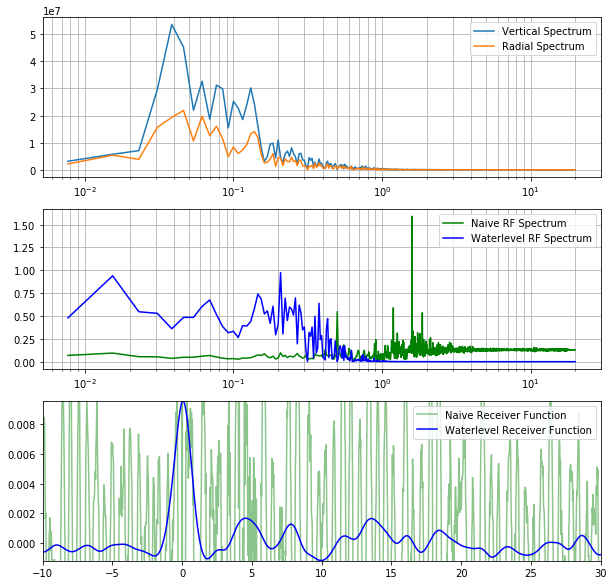

In [13]:
#plot data and compare
fig,ax = plt.subplots(3,1,figsize=(10,10))

ax[0].plot(freqsP,abs(V_spec[0:nPoints//2]), label='Vertical Spectrum')
ax[0].plot(freqsP,abs(R_spec[0:nPoints//2]), label='Radial Spectrum')
ax[0].set_xscale('log')
ax[0].grid(which='both')
ax[0].legend()

ax[1].plot(freqsP,abs(naive_rfSpec[0:nPoints//2]/10), label='Naive RF Spectrum', c='g')
ax[1].plot(freqsP,abs(water_rfSpec[0:nPoints//2]), label='Waterlevel RF Spectrum', c='b')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid(which='both')

ax[2].plot(time_rf, naive_rf.real, label='Naive Receiver Function', c='g', alpha=0.45)
ax[2].plot(time_rf, water_rf.real, label='Waterlevel Receiver Function', c='b')
ax[2].set_ylim(np.min(water_rf.real),np.max(water_rf.real))
ax[2].set_xlim(-10,30)
ax[2].legend()

plt.show()

##### Comments
Using the water level method to stabilize the spectral division provides a much more realistic and interpretable result.  Looking at the original naive receiver function spectrum compared to the one obtained using the water level method (middle plot), it can be seen how well the higher frequency noise has been removed.  Little to no energy is seen above the 1 Hz mark, and the recovered receiver function spectrum contains most of its energy across the same frequencies as the original data, indicating we are now recovering mostly signal instead of noise.

The time domain result (bottom plot) shows improved solution stability even better when compared with the naive approach.  The recovered receiver function shows a well developed peak at zero time containing the majority of the energy, followed by smaller amplitude arrivals which are well behaved in comparison to the naive approach and its wild oscillations.  Another aspect to take note of is the limited amount of energy before 0 time; this is to be expected as a seismic Green's function should be causal.




## Damped Approach - Frequency Stabilization
The final step is to calculate the receiver function using the same data again, but this time using the damped approach outlined above.

To better visualize the and compare the results, all three methods for spectral deconvolution will be displayed at once along with their associated power spectra.

In [14]:
###parameters for plot below.005
cross_spec = R_spec * np.conjugate(V_spec)
vPowerRaw = V_spec * np.conjugate(V_spec)
vPower_damped = V_spec * np.conjugate(V_spec)
vPower_Water = V_spec * np.conjugate(V_spec)

#set damping and water level values
dampVal = (0.005 * np.amax(vPower_damped))**0.5
floodHeight = 0.005 * np.amax(vPower_Water)

#apply water level
vPower_Water[vPower_Water < floodHeight] = floodHeight

#compute water level RF; spectrum and time
water_rfSpec = cross_spec / vPower_Water 
water_rf = np.fft.ifft(water_rfSpec)
water_rf = np.roll(water_rf, round(ztime/dt))

#compute damped RF; spectrum and time 
damp_rfSpec = cross_spec / (vPower_damped + dampVal**2)
damp_rf = np.fft.ifft(damp_rfSpec)
damp_rf = np.roll(damp_rf, round(ztime/dt))

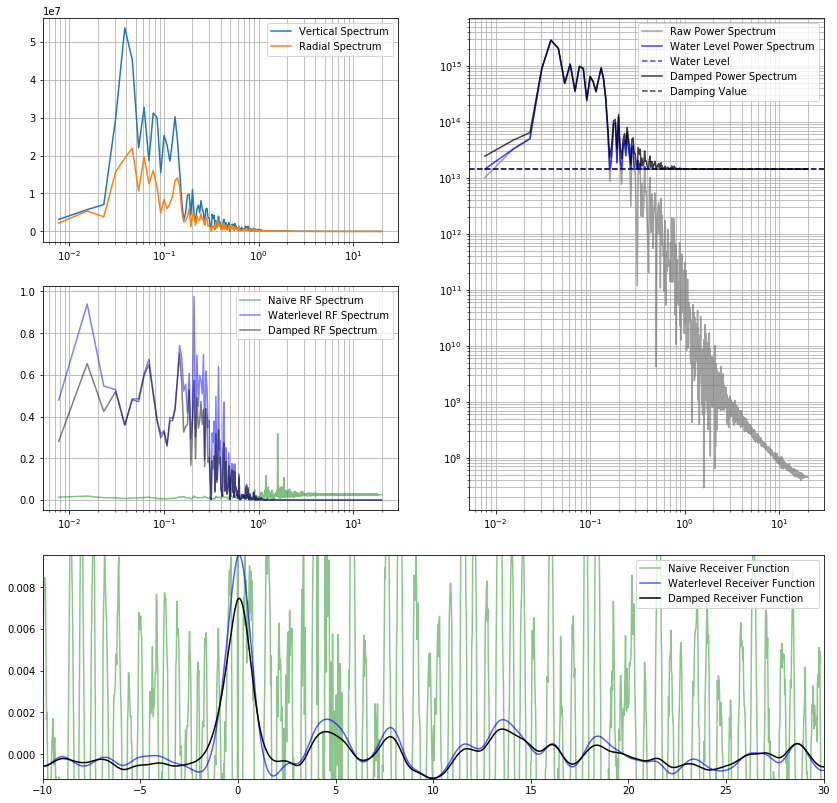

In [15]:
#plot all the data
fig = plt.figure(figsize=(14,14))

#raw trace spec plots
ax1 = plt.subplot2grid((3,2),(0,0), colspan=1)
ax1.plot(freqsP,abs(V_spec[0:nPoints//2]), label='Vertical Spectrum')
ax1.plot(freqsP,abs(R_spec[0:nPoints//2]), label='Radial Spectrum')
ax1.set_xscale('log')
ax1.grid(which='both')
ax1.legend()

#receiver func spec plots
ax2 = plt.subplot2grid((3,2),(1,0), colspan=1)
ax2.plot(freqsP,abs(naive_rfSpec[0:nPoints//2])/50, label='Naive RF Spectrum', c='g', alpha=0.5)
ax2.plot(freqsP,abs(water_rfSpec[0:nPoints//2]), label='Waterlevel RF Spectrum', c='b', alpha=0.5)
ax2.plot(freqsP,abs(damp_rfSpec[0:nPoints//2]), label='Damped RF Spectrum', c='k', alpha=0.5)
ax2.set_xscale('log')
ax2.legend()
ax2.grid(which='both')

#receiver func plots
ax3 = plt.subplot2grid((3,2),(2,0), colspan=2)
ax3.plot(time_rf, naive_rf.real, label='Naive Receiver Function', c='g', alpha=0.45)
ax3.plot(time_rf, water_rf.real, label='Waterlevel Receiver Function', c='b', alpha=0.65)
ax3.plot(time_rf, damp_rf.real, label='Damped Receiver Function', c='k')
ax3.set_ylim(np.min(water_rf.real),np.max(water_rf.real))
ax3.set_xlim(-10,30)
ax3.legend(loc='upper right')

#power spec plots
ax4 = plt.subplot2grid((3,2),(0,1), rowspan=2)
ax4.plot(freqsP,np.abs(vPowerRaw[0:nPoints//2]), c='gray', label='Raw Power Spectrum', alpha = 0.75)
ax4.plot(freqsP,vPower_Water[0:nPoints//2].real,c='b', label='Water Level Power Spectrum', alpha = 0.75)
ax4.axhline(y=floodHeight.real, c='b', ls='--', alpha = 0.75, label='Water Level')
ax4.plot(freqsP, vPower_damped[0:nPoints//2].real+dampVal.real**2, label='Damped Power Spectrum', 
        alpha = 0.75, c='k')
ax4.axhline(y=dampVal.real**2, c='k', ls='--', alpha = 0.75, label='Damping Value')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.grid(which='both')
ax4.legend()

plt.show()

##### Comments
Looking at the above plots, it can be seen that both the water level and damped methods produce very similar results.  This is expected as they are essentially doing the same thing - stabilizing low energy frequencies by increasing their value towards a certain limit.  However, the key differences can be seen when looking at both the amplitude and power spectrum plots.  Using the same value (0.5%), the water level spectrum shows higher frequency content than the damped solution.  This higher frequency content is also evident in the time domain representation with the loss of some shorter wavelength features using the damped method.  The reason for this can be seen by comparing the two methods power spectrum plots.  The water level method is binary - that is, either there are no changes (above the water level) or the water level is applied in full (below the water level).  In comparison, the damped solution has a sort of taper effect towards its set value.  For large values above the damping weight, little influence occurs, while for values very close to and below the weight, the influence increases.  As a result, the water level method cuts off all frequencies above its value to a constant energy level, while the damped method allows higher frequencies to 'bleed' in at energies above its value over a certain bandwidth.  Since we are performing division to obtain the receiver function, this gives lower energies at higher frequency values, or in other words, a reduction in noise.